In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
path = '/kaggle/input/model/pytorch/default/1/bert_finetuned'

In [5]:
tokenizer = BertTokenizer.from_pretrained(path)
model = BertForSequenceClassification.from_pretrained(path)

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [10]:
df_test = pd.read_csv('/kaggle/input/data-cleaning/cleaned_dataset.csv')  
texts = df_test['text'].fillna('').astype(str).tolist()  # Handle NaN and ensure all entries are strings
labels = df_test['label'].tolist()

In [12]:
# Tokenize the texts
try:
    encodings = tokenizer(
        texts,
        max_length=128,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )
    input_ids = encodings['input_ids'].to(device)
    attention_mask = encodings['attention_mask'].to(device)
except Exception as e:
    print("Tokenizer failed. Debugging the 'texts' variable:")
    for i, text in enumerate(texts):
        if not isinstance(text, str):
            print(f"Invalid entry at index {i}: {text}")
    raise e


In [16]:
model.eval()
predictions_list = []
with torch.no_grad():
    batch_size = 32
    for i in range(0, len(input_ids), batch_size):
        batch_input_ids = input_ids[i:i+batch_size]
        batch_attention_mask = attention_mask[i:i+batch_size]
        outputs = model(batch_input_ids, attention_mask=batch_attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1)
        predictions_list.extend(predictions.cpu().numpy())

In [17]:
# Print predictions
print("Predictions:", predictions_list)


Predictions: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [18]:
# Generate Classification Report
print("\nClassification Report:\n")
print(classification_report(labels, predictions_list, target_names=['False News', 'True News']))



Classification Report:

              precision    recall  f1-score   support

  False News       0.80      0.96      0.87     77677
   True News       0.97      0.85      0.91    125708

    accuracy                           0.89    203385
   macro avg       0.89      0.91      0.89    203385
weighted avg       0.91      0.89      0.90    203385



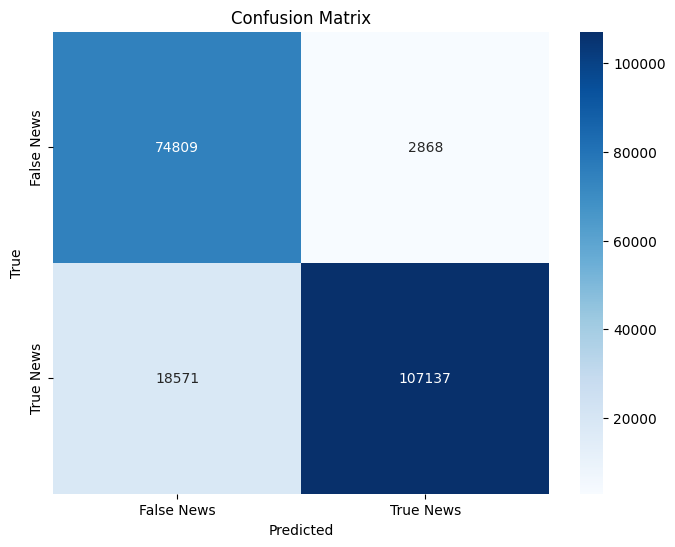

In [19]:
# Plot Confusion Matrix
conf_matrix = confusion_matrix(labels, predictions_list)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['False News', 'True News'], yticklabels=['False News', 'True News'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()